In [2]:
from zipfile import ZipFile
file_name = "/content/ForAiClass 2.zip"
 
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

Done


In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 5

# Define the CNN architecture
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load the data
train_data = datagen.flow_from_directory(
    '/content/ForAiClass 2',
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/ForAiClass 2',
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_data = datagen.flow_from_directory(
    '/content/ForAiClass 2',
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical'
)

# Check that the data generators contain at least one batch
if len(train_data) > 0 and len(val_data) > 0 and len(test_data) > 0:
    # Train the model
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=50
    )

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(test_data)

    # Save the model
    model.save('ivc_motif_detection_model.h5')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [5]:


import numpy as np 
import pandas as pd 


images = []
label = []
import os
for dirname, _, filenames in os.walk('/content/ForAiClass 2'):
    for filename in filenames:
        images.append(os.path.join(dirname, filename).split('/')[-1])
        label.append(os.path.join(dirname, filename).split('/')[-2])



In [6]:
import matplotlib.pyplot as plt
from torchvision import transforms as T
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import time
from torch.nn import functional as F
from torchvision import models
import torch.nn as nn
import torch
import random
import PIL

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
import os
print(os.listdir('/content/ForAiClass 2'))

['842.PNG', '834.PNG', '087.PNG', '079.PNG', '090.PNG', '840.PNG', '099.PNG', '094.PNG', '617.PNG', '091.PNG', '082.PNG', '074.PNG', '089.PNG', '845.PNG', '844.PNG', '843.PNG', '093.PNG', '839.PNG', '095.PNG', '080.PNG', '092.PNG', '624.PNG', '100.PNG', '841.PNG', '084.PNG', '096.PNG', '081.PNG', '838.PNG', '077.PNG', '631.PNG', '633.PNG', '832.PNG', '846.PNG', '101.PNG', '097.PNG', '831.PNG', '086.PNG', '088.PNG', '103.PNG', '836.PNG', '830.PNG', '098.PNG', '595.PNG', '632.PNG', '621.PNG', '083.PNG', '078.PNG', '634.PNG', '075.PNG', '076.PNG', '085.PNG', '102.PNG']


In [11]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [12]:
X=[]
Z=[]
IMG_SIZE=150
Motif='/content/ForAiClass 2'


In [13]:
def assign_label(img,Motif_type):
    return Motif_type

In [14]:
def make_train_data(Motif_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,Motif_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [15]:
make_train_data('Motif1',Motif)
print(len(X))

100%|██████████| 52/52 [00:00<00:00, 242.62it/s]

52


In [ ]:
# Visualizing some Random Images

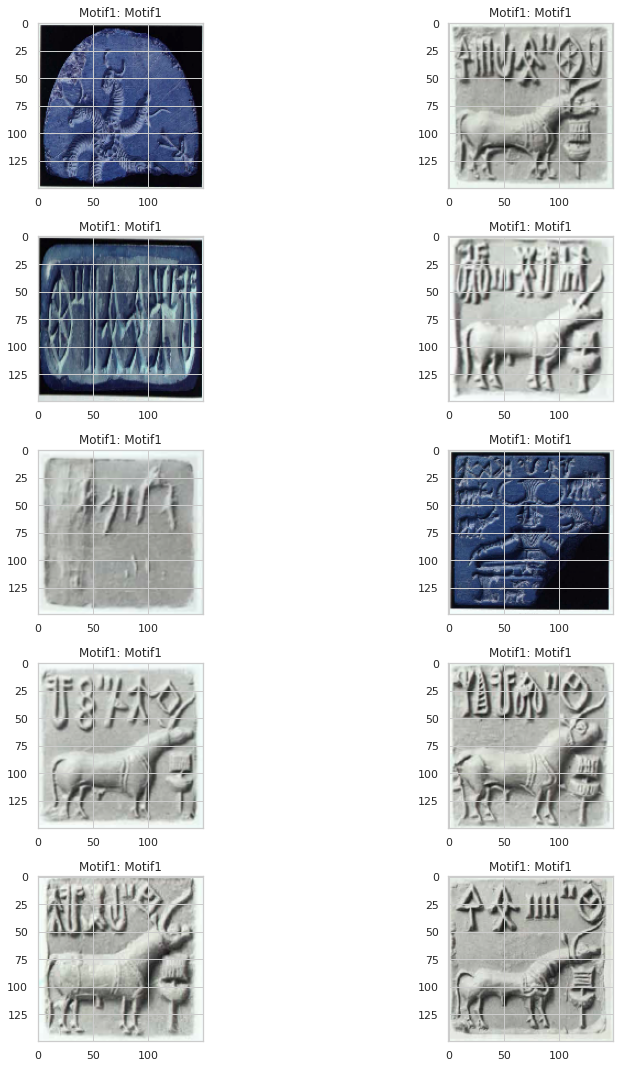

In [16]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Motif1: '+Z[l])
        
plt.tight_layout()

In [17]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [20]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [21]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [34]:
batch_size=10
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [35]:
red_lr

In [36]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(x_train)

In [37]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 96)      

In [39]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
3/3 [==============================] - 4s 1s/step - loss: 0.6442 - accuracy: 0.6897 - val_loss: 1.0179e-06 - val_accuracy: 1.0000
Epoch 2/50
3/3 [==============================] - 3s 956ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 3s 942ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 3s 952ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - v

In [40]:
model.save('C:/model2.h5')

In [41]:
from tensorflow import keras
model = keras.models.load_model('C:/model2.h5')

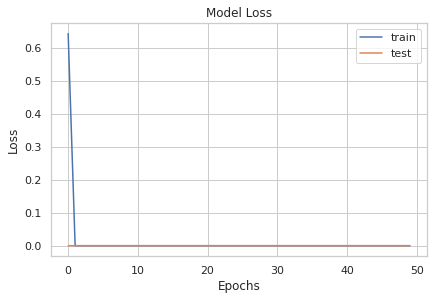

In [43]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

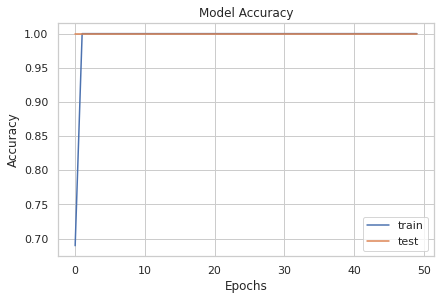

In [46]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# Predictons on the Validation Set

In [48]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

1/1 [==============================] - 1s 816ms/step


In [52]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

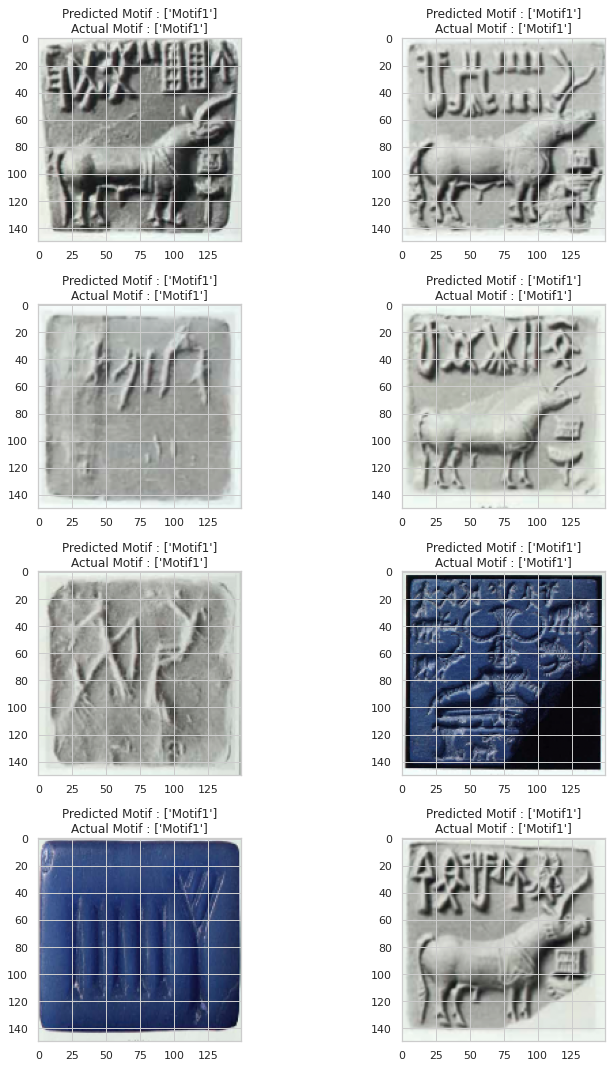

In [54]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[prop_class[count]])
        actual_motif = np.argmax(y_test[prop_class[count]]) if np.ndim(y_test[prop_class[count]]) > 0 else y_test[prop_class[count]]
        ax[i, j].set_title("Predicted Motif : " + str(le.inverse_transform([pred_digits[prop_class[count]]])) + "\n" +
                           "Actual Motif : " + str(le.inverse_transform([actual_motif])))
        plt.tight_layout()
        count += 1


In [ ]:
# Visualizing the layout

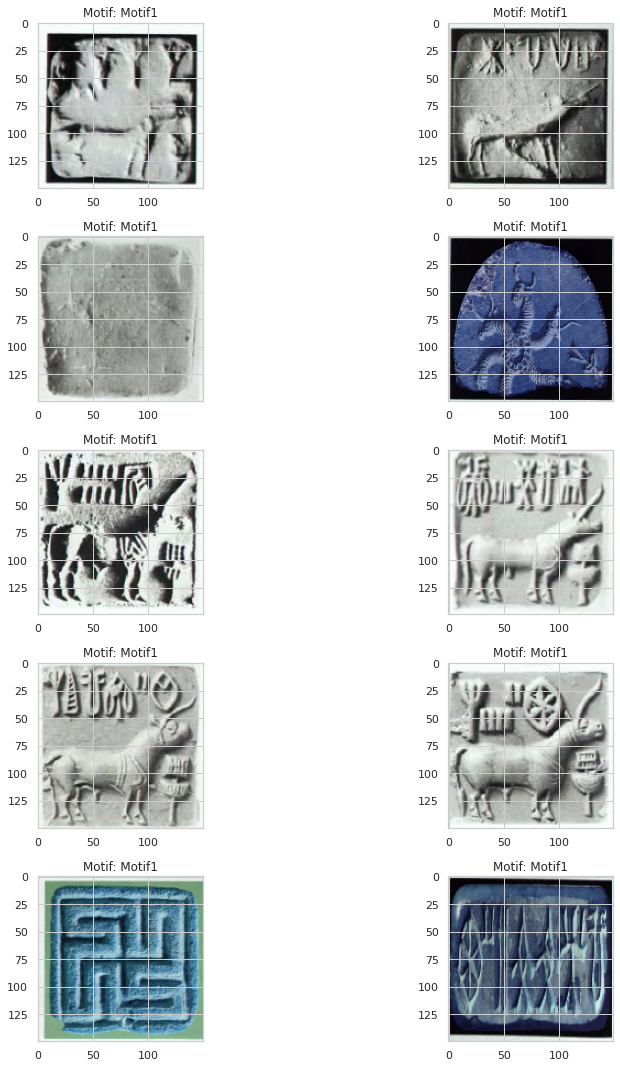

In [59]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Motif: '+Z[l])
        
plt.tight_layout()